# Linear Regression with the Normal Equation

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

Setting Grid Options

In [2]:
mpl.rc('axes', labelsize=5)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

Creating random data points on the equation

In [3]:
x = 4 * np.random.rand(100, 1)
y = 6 + 3 * x + np.random.randn(100, 1)

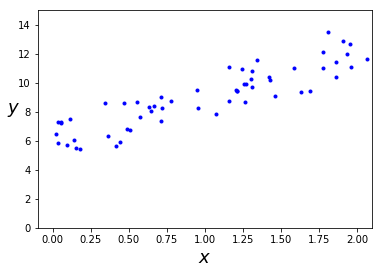

In [4]:

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.1, 2.1, 0, 15])
plt.show()

Fit a regression line

In [5]:
x_b = np.c_[np.ones((100, 1)), x] # adding x = 1 to each distance 
tht_b = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [6]:
tht_b

array([[6.04140857],
       [2.91693035]])

In [7]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new] # adding x = 1 to each distance 
y_predict = x_new_b.dot(tht_b)

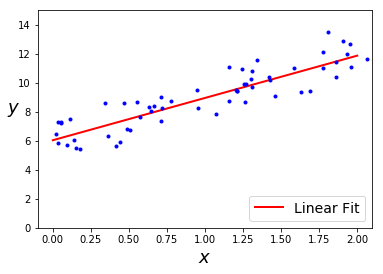

In [8]:
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Linear Fit")
plt.legend(loc="lower right", fontsize=14)
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.1, 2.1, 0, 15])
plt.show()

In [9]:

from sklearn.linear_model import LinearRegression as lr
lin_reg = lr()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)

[6.04140857] [[2.91693035]]


In [10]:
lin_reg.predict(x_new)

array([[ 6.04140857],
       [11.87526927]])

Least Squares 

In [11]:
np.linalg.lstsq(x_b, y, rcond=1e-6)[0]

array([[6.04140857],
       [2.91693035]])

# Linear Regression with Batch Gradient Descent

In [26]:
def gradient_descent(theta, eta = 0.1, n_iter = 3000, m = 100, x = x_b):
    for i in range(n_iter):
        grads = 2/m * x.T.dot(x.dot(theta) - y)
        theta = theta - eta * grads
    return theta

In [27]:
gradient_descent(np.random.randn(2,1))

array([[6.04140857],
       [2.91693035]])

In [73]:
def plot_gradient_descent(theta, eta = 0.1, n_iter = 1000, theta_path=None, x_b = x_b):
    theta_path = []
    m = len(x_b)
    plt.plot(x, y, "b.")
    for i in range(n_iter):
        if i < 10:
            y_predict = x_new_b.dot(theta)
             
            if i > 0:
                style = "b-"
            else:
                style = "r--"
            plt.plot(x_new, y_predict, style)

        grads = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * grads
        if theta_path is not None:
            theta_path.append(theta)

    plt.xlabel("$x$", fontsize=18)
    plt.axis([-0.1, 2.1, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

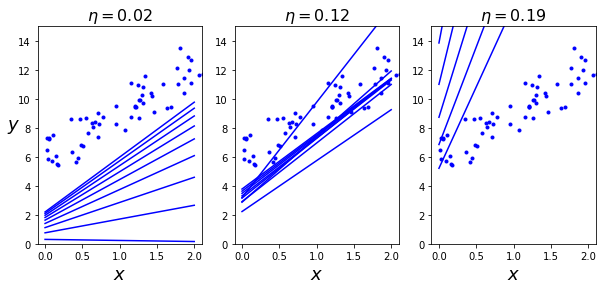

In [74]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.12, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.19)
plt.show()

# Stochastic Gradient Descent

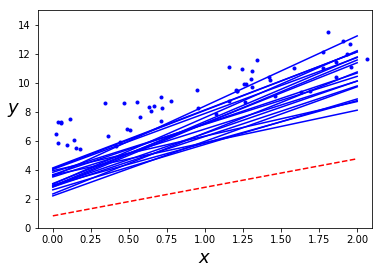

In [75]:
theta_path_sgd = []
m = len(x_b)
n_epochs = 150
t0 = 5
t1 = 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = x_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(x_new, y_predict, style) 
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(x, y, "b.")                                 
plt.xlabel("$x$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([-0.1, 2.1, 0, 15])                         
plt.show() 